<a href="https://colab.research.google.com/github/SoniaPMi/Master-IA/blob/main/Hunger_games_v6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

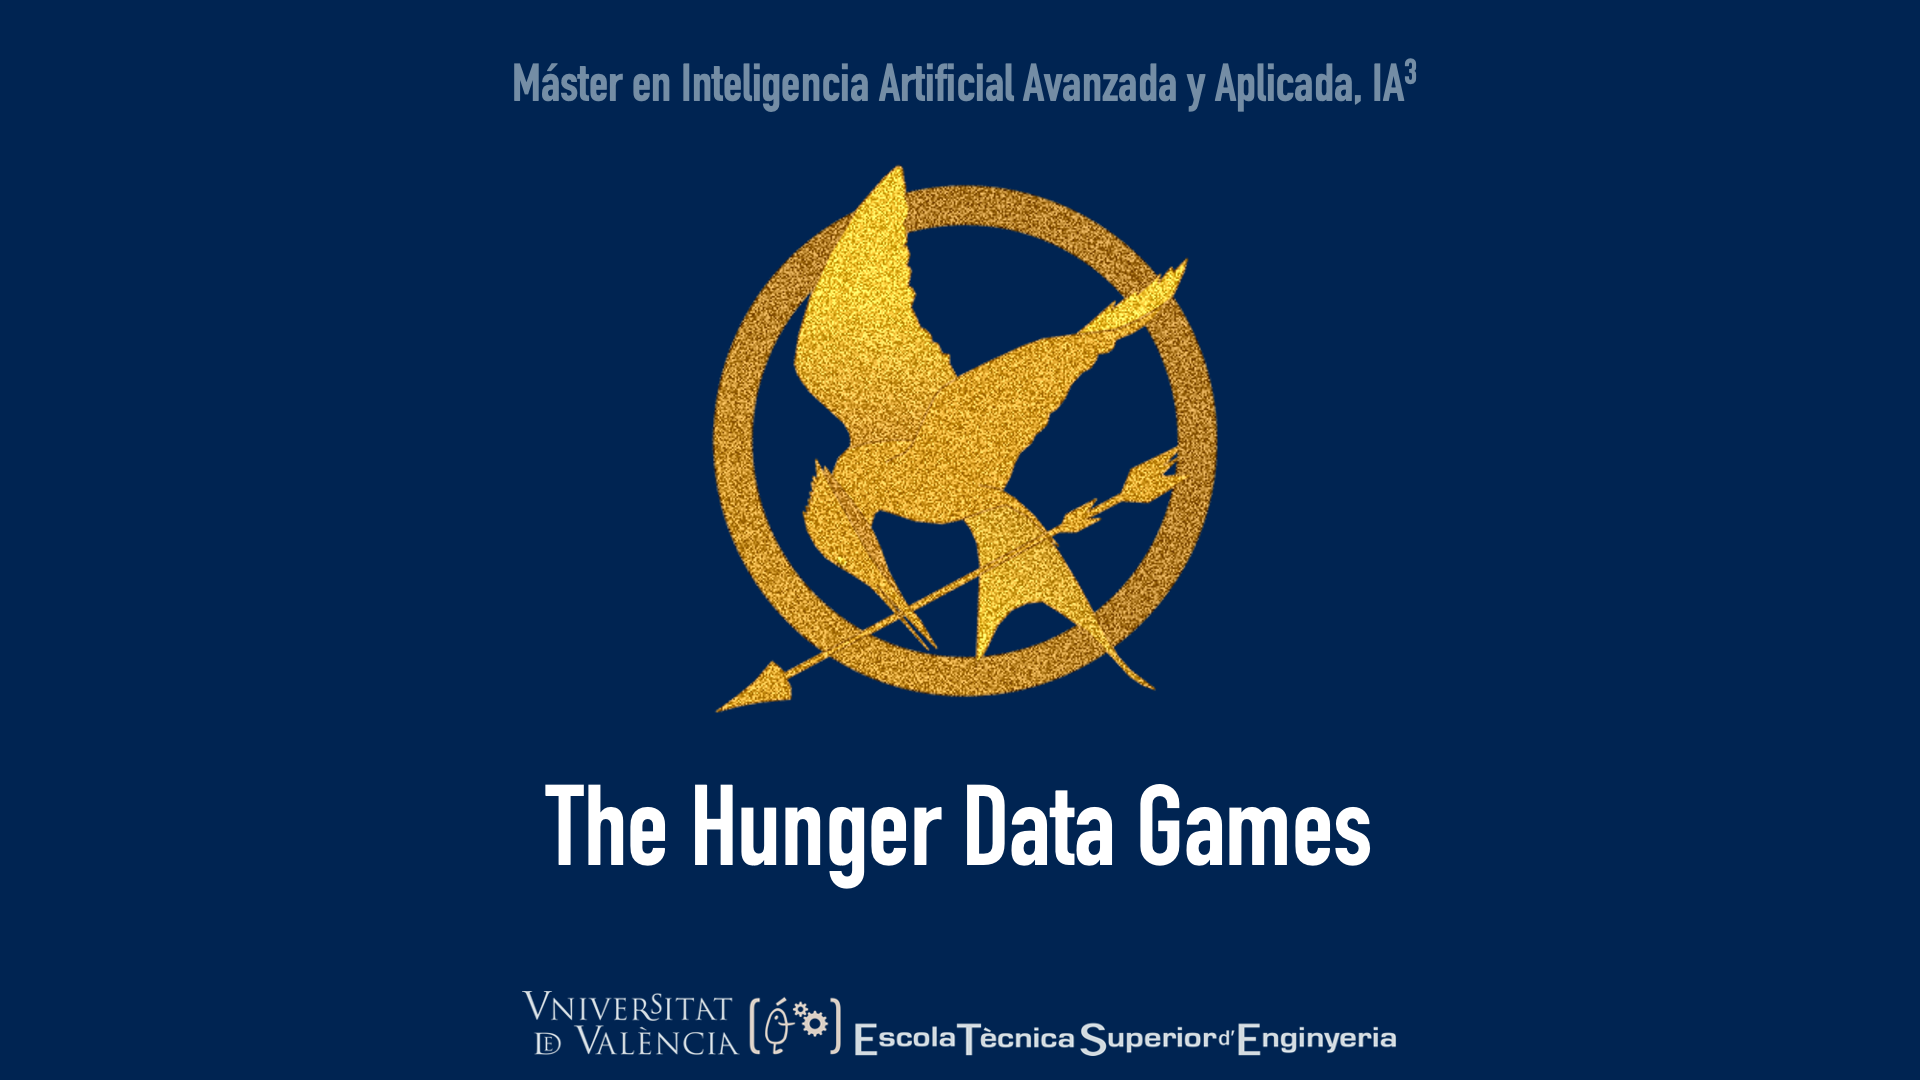

Wellcome to the first hunger data games!!! You have been selected as tributes from your sectors. In this edition you will be facing each other in a classification competition. The dataset you will be facing is this one:



In [248]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(123)

from sklearn.model_selection import train_test_split


url = "https://raw.githubusercontent.com/CuadraAlconero/IDAL_IA3_CuadraAlconero/main/glass.csv"
dataframe = pd.read_csv(url, header=0)
dataframe.columns = ["refractive_index", "sodium", "magnesium", "aluminum", "silicon", "potassium", "calcium", "barium", "iron", "type_of_glass"]

> The target variable is type_of_glass

In [ ]:
dataframe.head(10)

,refractive_index,sodium,magnesium,aluminum,silicon,potassium,calcium,barium,iron,type_of_glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
7,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
8,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
9,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1


A few recommendations for you to solve the exercise. Remember the different types of algorithm that we have studied and follow a natural path in building the exercise. Commence using a single estimator and try to build a bagging estimator.

For the evaluation metric check this webpage:

https://scikit-learn.org/stable/modules/model_evaluation.html

Specially check those called balanced_accuracy and f1_micro.

Finally the submission of the exercise must be a model file with the name of your team (find one which is cool I will add the coolness of the name to the final grade). 

Check this webpage for saving the model: https://scikit-learn.org/stable/modules/model_persistence.html

One more thing I will evaluate using the np.random.seed(123) use it for training your model.

*In* case that a preprocessing of data is performed include a class in the notebook which transforms the original input to your desired one.

> ## ANÁLISIS DE LOS DATOS.

>Comprobamos valores nulos

In [ ]:
dataframe.isna().sum()

refractive_index    0
sodium              0
magnesium           0
aluminum            0
silicon             0
potassium           0
calcium             0
barium              0
iron                0
type_of_glass       0
dtype: int64

In [ ]:

dataframe.describe()

,refractive_index,sodium,magnesium,aluminum,silicon,potassium,calcium,barium,iron,type_of_glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


>Eliminamos muestras repetidas y vemos un resumen de los datos que tenemos

In [ ]:
dataframe = dataframe.drop_duplicates()
dataframe.describe()

,refractive_index,sodium,magnesium,aluminum,silicon,potassium,calcium,barium,iron,type_of_glass
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518348,13.404085,2.679202,1.449484,72.655070,0.498873,8.954085,0.175869,0.057277,2.788732
std,0.003033,0.816662,1.443691,0.495925,0.773998,0.653185,1.425882,0.498245,0.097589,2.105130
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519150,13.810000,3.600000,1.630000,73.090000,0.610000,9.150000,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [ ]:
dataframe.groupby("type_of_glass").mean()
# %_elemento en cada tipo:

,refractive_index,sodium,magnesium,aluminum,silicon,potassium,calcium,barium,iron
type_of_glass,,,,,,,,,
1,1.518669,13.228261,3.548551,1.173913,72.631449,0.452319,8.786087,0.012899,0.057826
2,1.518619,13.111711,3.002105,1.408158,72.598026,0.521053,9.073684,0.050263,0.079737
3,1.517964,13.437059,3.543529,1.201176,72.404706,0.406471,8.782941,0.008824,0.057059
5,1.518928,12.827692,0.773846,2.033846,72.366154,1.470000,10.123846,0.187692,0.060769
6,1.517456,14.646667,1.305556,1.366667,73.206667,0.000000,9.356667,0.000000,0.000000
7,1.517116,14.442069,0.538276,2.122759,72.965862,0.325172,8.491379,1.040000,0.013448


In [ ]:
dataframe.groupby("type_of_glass").count()

,refractive_index,sodium,magnesium,aluminum,silicon,potassium,calcium,barium,iron
type_of_glass,,,,,,,,,
1,69,69,69,69,69,69,69,69,69
2,76,76,76,76,76,76,76,76,76
3,17,17,17,17,17,17,17,17,17
5,13,13,13,13,13,13,13,13,13
6,9,9,9,9,9,9,9,9,9
7,29,29,29,29,29,29,29,29,29


>Vemos que cada característica presenta un rango de valores diferentes, estan en diferentes escalas de rango. Deperemos "escalar" los datos.

>Vamos a observar que disrtubición presentan, para determinar que método aplicar.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


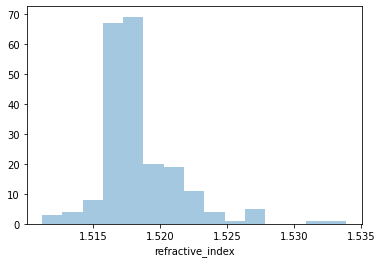

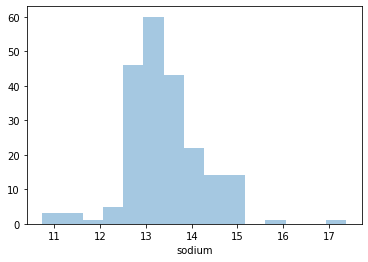

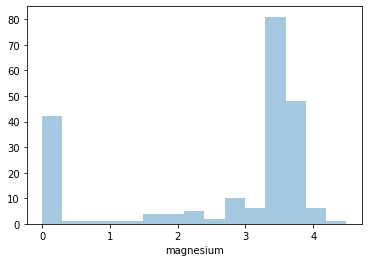

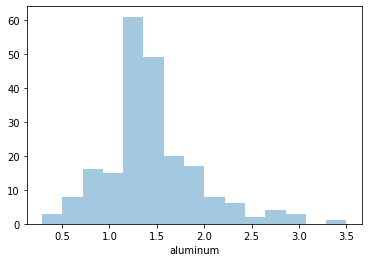

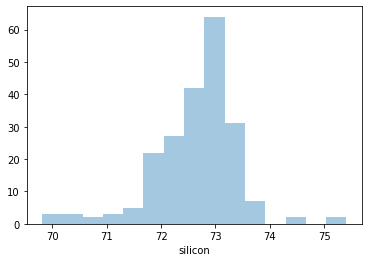

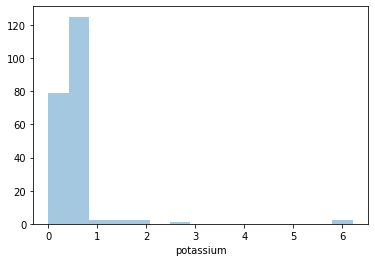

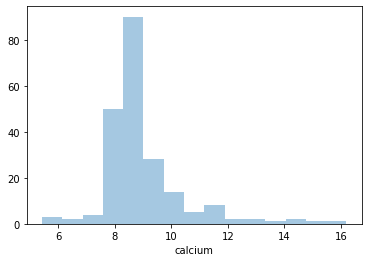

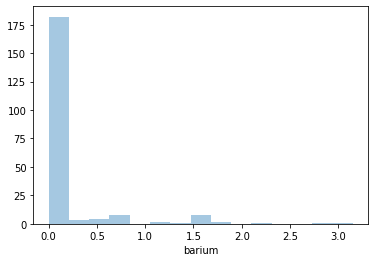

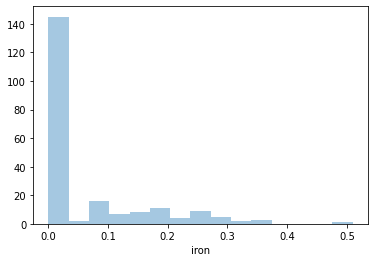

In [ ]:
features = dataframe.iloc[:,:-1]

for i in features:
    skew = features[i].skew()
    sns.distplot(features[i], kde= False, bins=15) #si  no le pongo kde false me da un warning
    
    plt.show()

> Dado que no todas las características parecen llevar una distribución normal y hemos observado que los rangos de cada elemento son muy diferentes, aplicaremos estandarización a las "fearures" de nuestro modelo.

>Vamos a analizar el Target.

In [ ]:
dataframe['type_of_glass'].value_counts()

2    76
1    69
7    29
3    17
5    13
6     9
Name: type_of_glass, dtype: int64

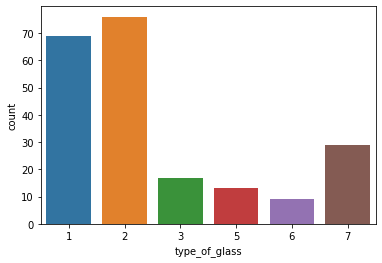

In [ ]:
import seaborn as sns

sns.countplot(x='type_of_glass', data=dataframe)
plt.show()

>Procedemos a ver en que proporcion de cada elemento tengo en cada tipo de cistal. Como tenemos más muestras de algunos cristales que de otros, el modelo seguramente no será igual de preciso para acertar cada tipo de cristal.

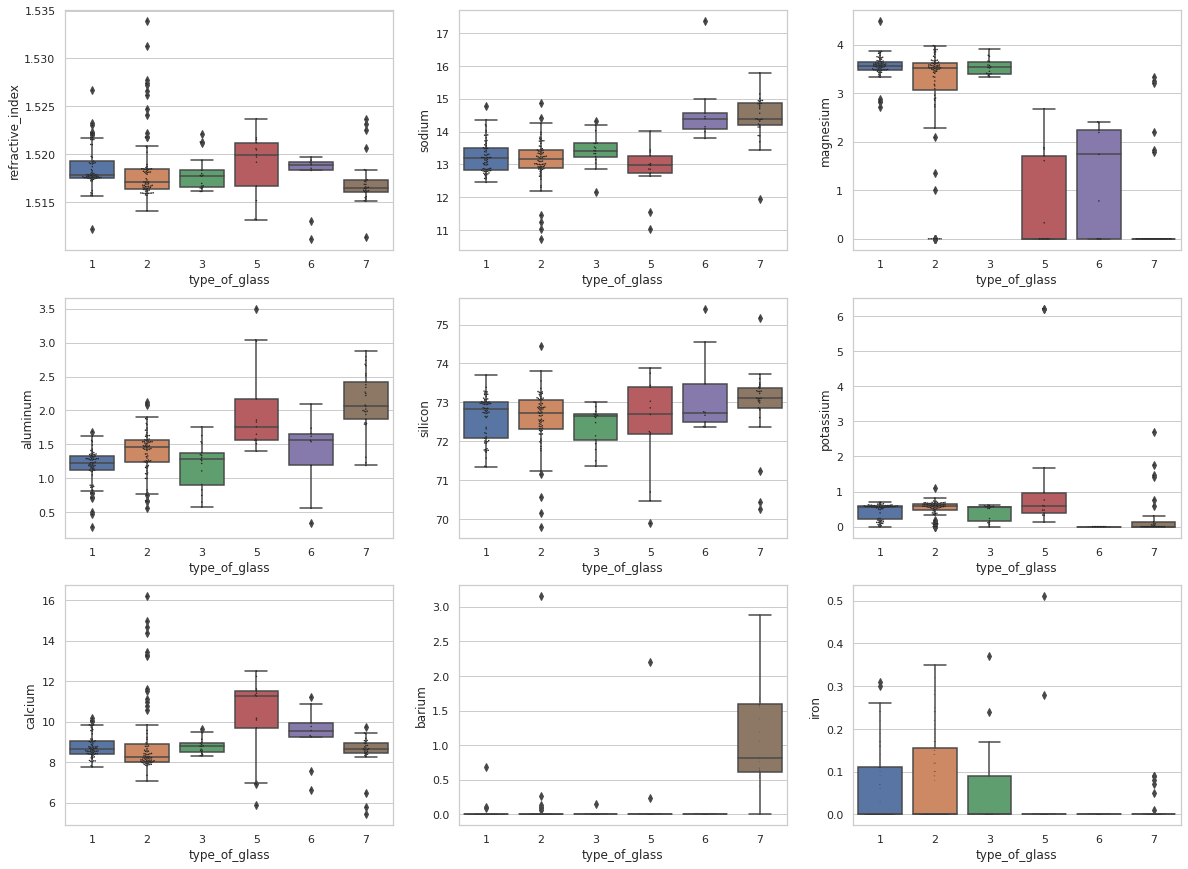

In [ ]:
sns.set(style="whitegrid", font_scale=1)
plt.subplots(figsize = (20,15))

plt.subplot(3,3,1)
ax = sns.boxplot(x="type_of_glass", y="refractive_index", data=dataframe)
ax = sns.swarmplot(x="type_of_glass", y="refractive_index", data=dataframe, color=".15", size=1.5)

plt.subplot(3,3,2)
ax = sns.boxplot(x="type_of_glass", y="sodium", data=dataframe)
ax = sns.swarmplot(x="type_of_glass", y="sodium", data=dataframe, color=".15", size=1.5)

plt.subplot(3,3,3)
ax = sns.boxplot(x="type_of_glass", y="magnesium", data=dataframe)
ax = sns.swarmplot(x="type_of_glass", y="magnesium", data=dataframe, color=".15", size=1.5)

plt.subplot(3,3,4)
ax = sns.boxplot(x="type_of_glass", y="aluminum", data=dataframe)
ax = sns.swarmplot(x="type_of_glass", y="aluminum", data=dataframe, color=".15", size=1.5)

plt.subplot(3,3,5)
ax = sns.boxplot(x="type_of_glass", y="silicon", data=dataframe)
ax = sns.swarmplot(x="type_of_glass", y="silicon", data=dataframe, color=".15", size=1.5)

plt.subplot(3,3,6)
ax = sns.boxplot(x="type_of_glass", y="potassium", data=dataframe)
ax = sns.swarmplot(x="type_of_glass", y="potassium", data=dataframe, color=".15", size=1.5)

plt.subplot(3,3,7)
ax = sns.boxplot(x="type_of_glass", y="calcium", data=dataframe)
ax = sns.swarmplot(x="type_of_glass", y="calcium", data=dataframe, color=".15", size=1.5)

plt.subplot(3,3,8)
ax = sns.boxplot(x="type_of_glass", y="barium", data=dataframe)
ax = sns.swarmplot(x="type_of_glass", y="barium", data=dataframe, color=".15", size=0.55)

plt.subplot(3,3,9)
ax = sns.boxplot(x="type_of_glass", y="iron", data=dataframe)
ax = sns.swarmplot(x="type_of_glass", y="iron", data=dataframe, color=".15", size=0.65)

plt.show()

Podemos ver que tipos de cristales podrían presentar Outliers, sin embargo, no vamos a eliminarlos ya que como no disponemos de muchos datos y además, no sabemos con certeza que lo sean, ya que podría significar simplemente que es un cristal de dicho tipo pero con pureza inferior, o reciclado.

> ## PREPARAR DATOS (**OJOOO**!! HAY QUE CREAR UNA CLASE CON ESTO)

In [249]:
dataframe = dataframe.drop_duplicates()

In [250]:
# Standarization
from sklearn.preprocessing import StandardScaler

X = dataframe.iloc[:,:-1]
std_scl = StandardScaler()
X_transformed = std_scl.fit_transform(X)
X_transformed_df = pd.DataFrame(X_transformed)
X_transformed_df.columns = ["refractive_index", "sodium", "magnesium", "aluminum", "silicon", "potassium", "calcium", "barium", "iron"]

X_transformed_df.head(5)

,refractive_index,sodium,magnesium,aluminum,silicon,potassium,calcium,barium,iron
0,0.879840,0.289558,1.257238,-0.706370,-1.133248,-0.673480,-0.143466,-0.353808,-0.588301
1,-0.243816,0.596403,0.639311,-0.180863,0.097037,-0.028962,-0.790201,-0.353808,-0.588301
2,-0.716412,0.154546,0.604596,0.182950,0.433746,-0.167073,-0.825349,-0.353808,-0.588301
3,-0.227291,-0.238216,0.701798,-0.322346,-0.058368,0.109149,-0.516041,-0.353808,-0.588301
4,-0.306608,-0.164573,0.653197,-0.423405,0.550299,0.078457,-0.621487,-0.353808,-0.588301


In [251]:
#X sin Standarization
#X_transformed_df = dataframe.iloc[:,:-1]

In [252]:
Y = dataframe.iloc[:,-1:]
Y.head(5)

,type_of_glass
0,1
1,1
2,1
3,1
4,1


>** CREAR LA CLASE



> # Train_test_split: 75%-Train / 25%-Test

> Tenemos un problema de clasificación, ya que nuestra target es una variable categórica con 6 tipos o clases. Empezamos con un árbol de decisiones como modelo.

In [253]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [254]:
X_train, X_test, Y_train, Y_test = train_test_split(X_transformed_df, Y)
#como los datos están ordenados por tipos de cristales, los desordeno con shuffle

In [255]:
print(Y_train.value_counts())
print(Y_test.value_counts())

type_of_glass
2                59
1                55
7                16
3                14
5                 9
6                 6
dtype: int64
type_of_glass
2                17
1                14
7                13
5                 4
6                 3
3                 3
dtype: int64


># Modelo inicial: DecisionTreeClassifier

In [256]:
#definir modelo
model = DecisionTreeClassifier(criterion="entropy")

In [257]:
#entrenar modelo
model.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy')

In [258]:
print('Score:')
print('Sobre el conjunto de entrenamiento: {:.2f}'.format(model.score(X_train, Y_train)))
print('Sobre el conjunto de test:          {:.2f}'.format(model.score(X_test, Y_test)))

Score:
Sobre el conjunto de entrenamiento: 1.00
Sobre el conjunto de test:          0.69


In [259]:
from  sklearn.metrics import accuracy_score
print('Accuracy Score:')
print('Sobre el conjunto de entrenamiento: {:.2f}'.format(accuracy_score(Y_train, model.predict(X_train))))
print('Sobre el conjunto de test:          {:.2f}'.format(accuracy_score(Y_test, model.predict(X_test))))

Accuracy Score:
Sobre el conjunto de entrenamiento: 1.00
Sobre el conjunto de test:          0.69


In [260]:
from sklearn.metrics import balanced_accuracy_score
print('Balanced Accuracy Score:')
print('Sobre el conjunto de entrenamiento: {:.2f}'.format(balanced_accuracy_score(Y_train, model.predict(X_train))))
print('Sobre el conjunto de test:          {:.2f}'.format(balanced_accuracy_score(Y_test, model.predict(X_test))))

Balanced Accuracy Score:
Sobre el conjunto de entrenamiento: 1.00
Sobre el conjunto de test:          0.72


In [261]:
from sklearn.metrics import f1_score
print('F1 Score:')
print('Sobre el conjunto de entrenamiento:', (f1_score(Y_train,model.predict(X_train),average=None)))
print('Sobre el conjunto de test         :', (f1_score(Y_test,model.predict(X_test),average=None)))

F1 Score:
Sobre el conjunto de entrenamiento: [1. 1. 1. 1. 1. 1.]
Sobre el conjunto de test         : [0.66666667 0.61111111 0.33333333 0.88888889 0.75       0.81818182]


In [262]:
print('F1 Score Micro:')
print('Sobre el conjunto de entrenamiento: {:.2f}'.format(f1_score (Y_train, model.predict(X_train), average='micro')))
print('Sobre el conjunto de test:          {:.2f}'.format(f1_score (Y_test, model.predict(X_test),  average='micro')))

F1 Score Micro:
Sobre el conjunto de entrenamiento: 1.00
Sobre el conjunto de test:          0.69


Sin optimizar el árbol parece que pueda estar sobreajustando.

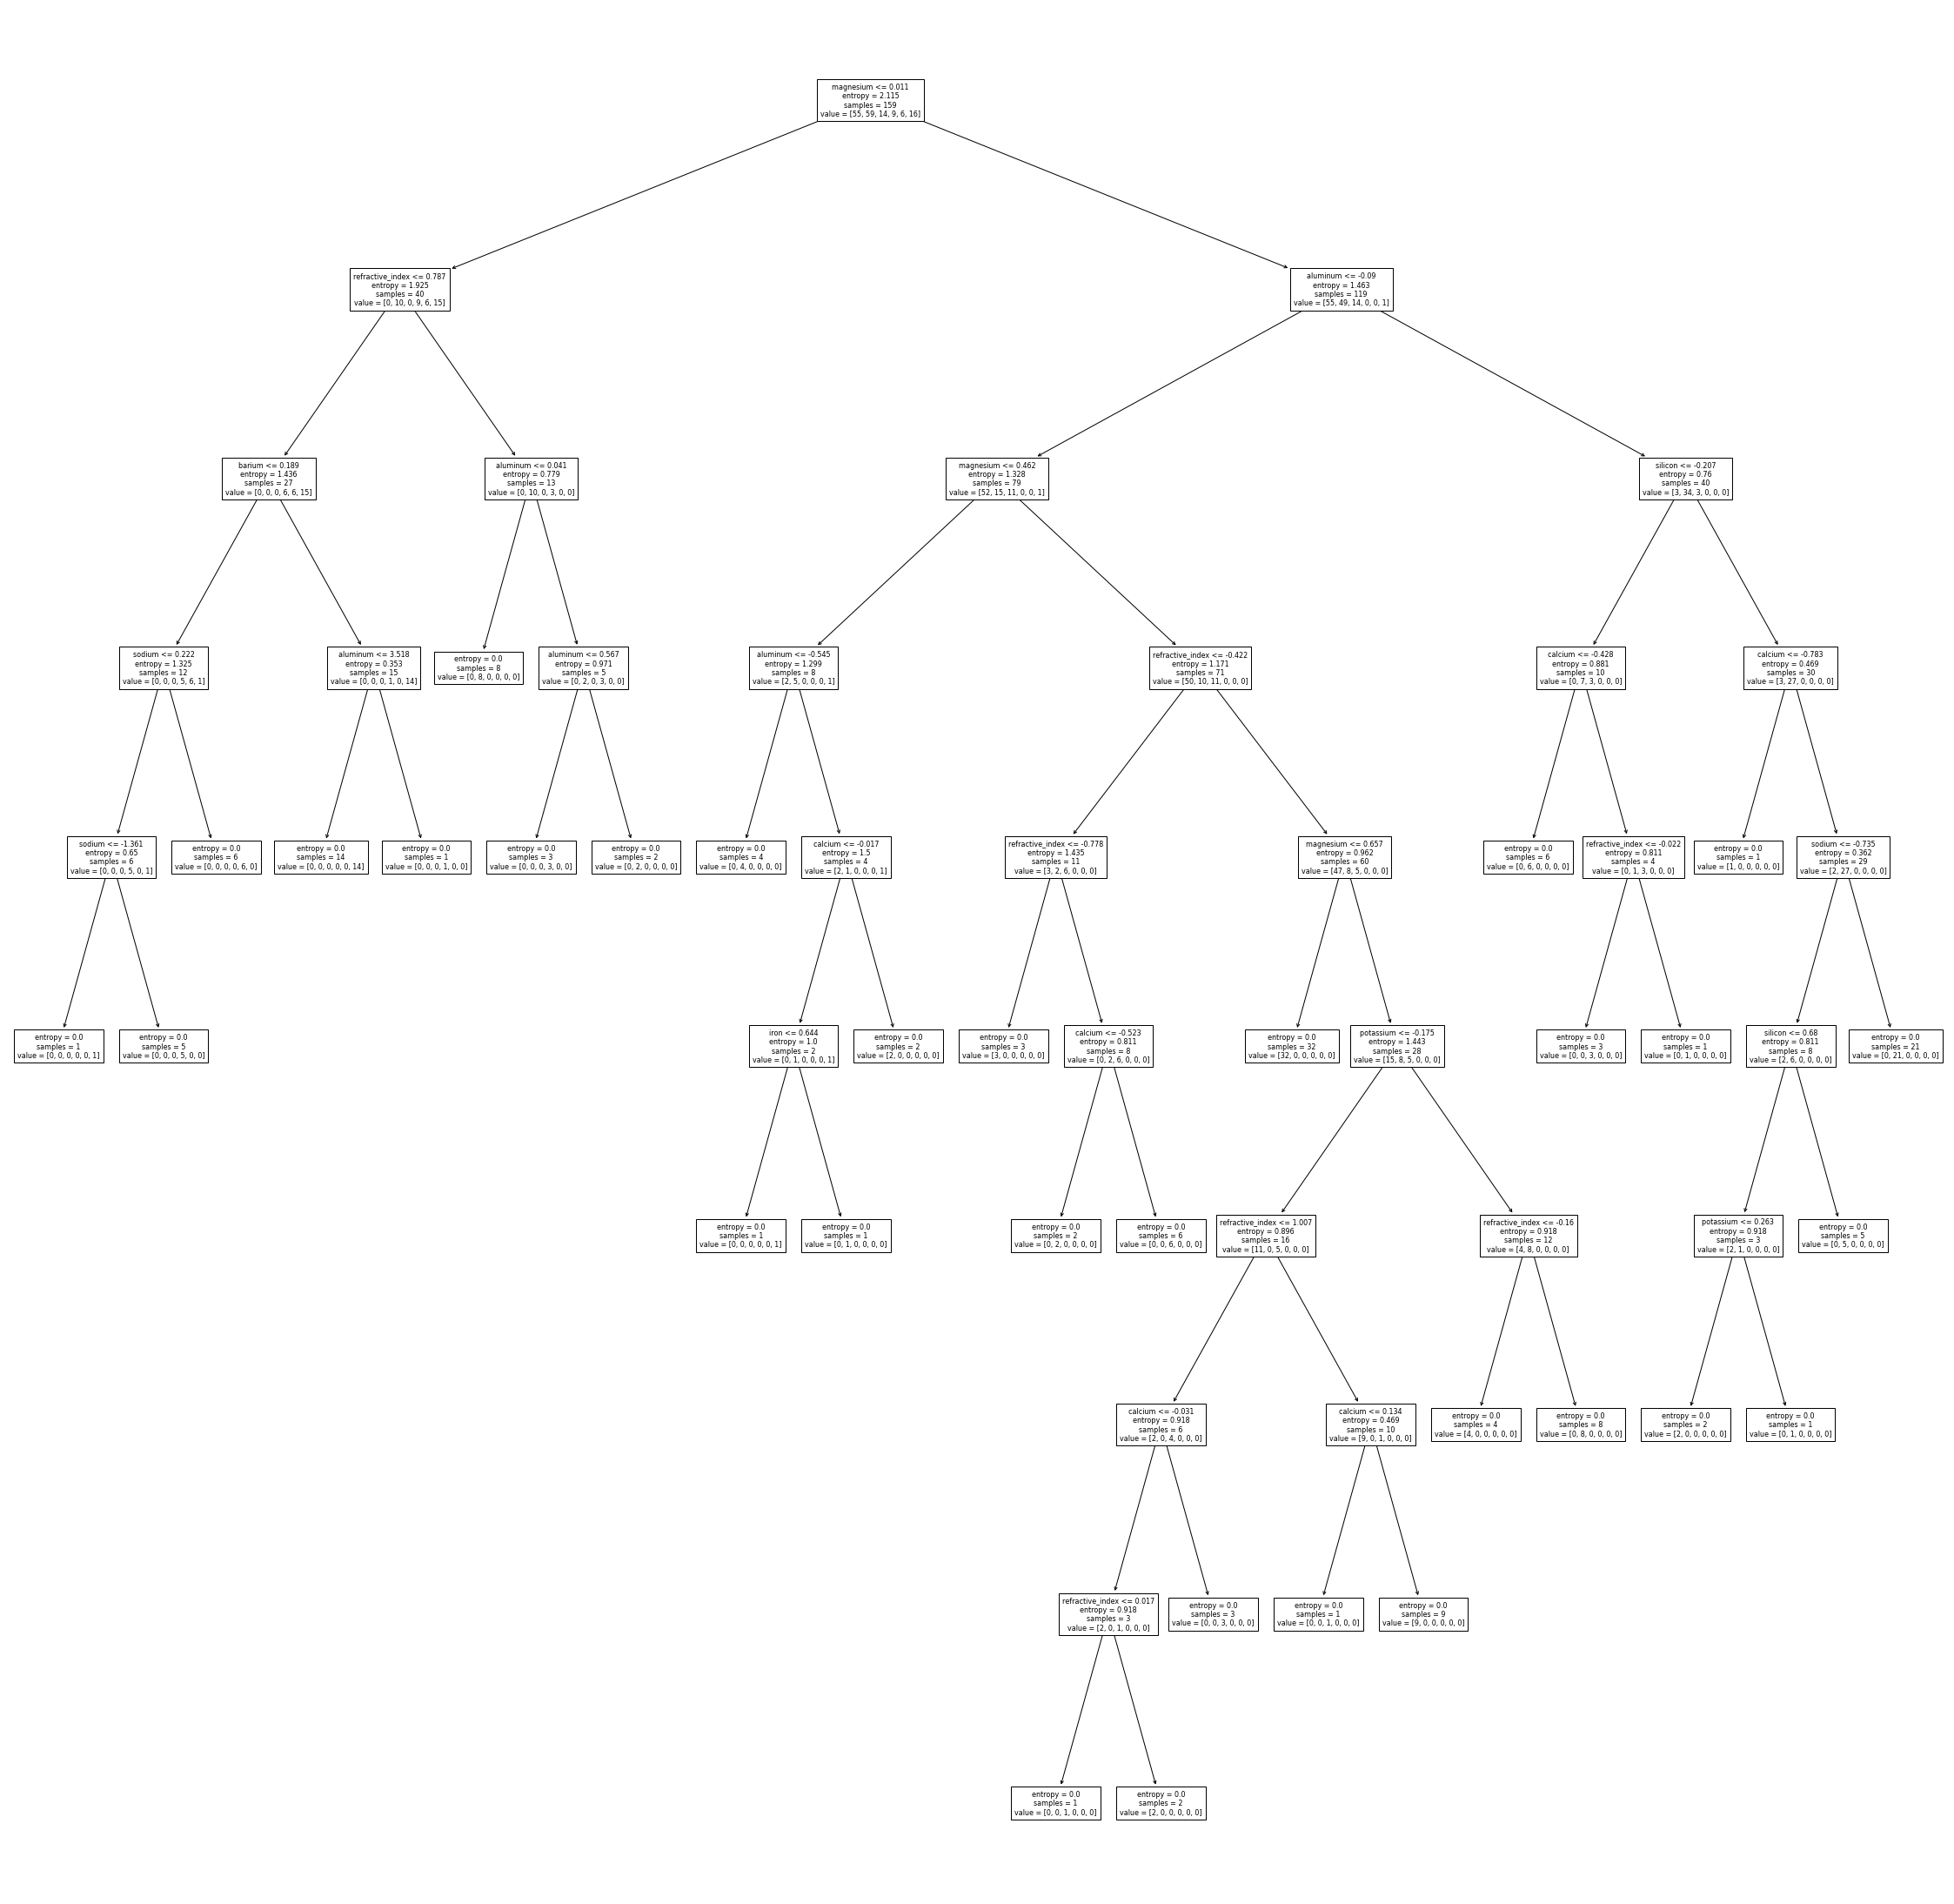

In [263]:
fig, ax = plt.subplots(figsize=(40, 40))
plot_tree(model, feature_names=X_transformed_df.columns, fontsize=8)
plt.show()

> # Ajustamos los hiperparámetros del modelo inicial (Modelo Tuneado)

In [264]:
model2 = DecisionTreeClassifier(criterion="entropy", max_depth=20, min_samples_split=4)
model2.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_split=4)

In [265]:
print("Metrica del modelo_base entrenado", model.score(X_train, Y_train))
print("Metrica del modelo_2 entrenado", model2.score(X_train, Y_train))

print("Metrica del modelo_base testeando", model.score(X_test, Y_test))
print("Metrica del modelo_2 testeando", model2.score(X_test, Y_test))

Metrica del modelo_base entrenado 1.0
Metrica del modelo_2 entrenado 0.9811320754716981
Metrica del modelo_base testeando 0.6851851851851852
Metrica del modelo_2 testeando 0.7222222222222222


In [266]:
print('Balanced Accuracy Score:')
print('Modelo inicial:')
print('Sobre el conjunto de entrenamiento: {:.2f}'.format(balanced_accuracy_score(Y_train, model.predict(X_train))))
print('Sobre el conjunto de test:          {:.2f}'.format(balanced_accuracy_score(Y_test, model.predict(X_test))))

print('Modelo tuneado:')
print('Sobre el conjunto de entrenamiento: {:.2f}'.format(balanced_accuracy_score(Y_train, model2.predict(X_train))))
print('Sobre el conjunto de test:          {:.2f}'.format(balanced_accuracy_score(Y_test, model2.predict(X_test))))


Balanced Accuracy Score:
Modelo inicial:
Sobre el conjunto de entrenamiento: 1.00
Sobre el conjunto de test:          0.72
Modelo tuneado:
Sobre el conjunto de entrenamiento: 0.97
Sobre el conjunto de test:          0.78


Mejoramos la precisión de nuestro modelo al testear. En entrenamiento baja un poco la precisión pero no es importante, ya que el 1 del modelo inicial podría deberse a que el modelo estaba sobreajustado, es decir, ha aprendido "de memoria". Podemos decir, que ahora hemos corregido el sobreajuste y hemos aumentado la precisión del modelo.

In [267]:
print('F1 Score Simple:')
print('Modelo inicial:')
print('Sobre el conjunto de entrenamiento: {:.2f}'.format(f1_score (Y_train, model.predict(X_train), average='micro')))
print('Sobre el conjunto de test:          {:.2f}'.format(f1_score (Y_test, model.predict(X_test),  average='micro')))
print('Modelo tuneado:')
print('Sobre el conjunto de entrenamiento: {:.2f}'.format(f1_score (Y_train, model2.predict(X_train), average='micro')))
print('Sobre el conjunto de test:          {:.2f}'.format(f1_score (Y_test, model2.predict(X_test),  average='micro')))

F1 Score Simple:
Modelo inicial:
Sobre el conjunto de entrenamiento: 1.00
Sobre el conjunto de test:          0.69
Modelo tuneado:
Sobre el conjunto de entrenamiento: 0.98
Sobre el conjunto de test:          0.72


In [268]:
#print("accuracy_score modelo_base", accuracy_score(Y_test, model.predict(X_test)))
#print("accuracy_score modelo 2", accuracy_score(Y_test, model2.predict(X_test)))

In [269]:
#print("f1_score modelo_base", f1_score(Y_test,model.predict(X_test),average=None))
#print("f1_score modelo_2", f1_score(Y_test,model2.predict(X_test),average=None))

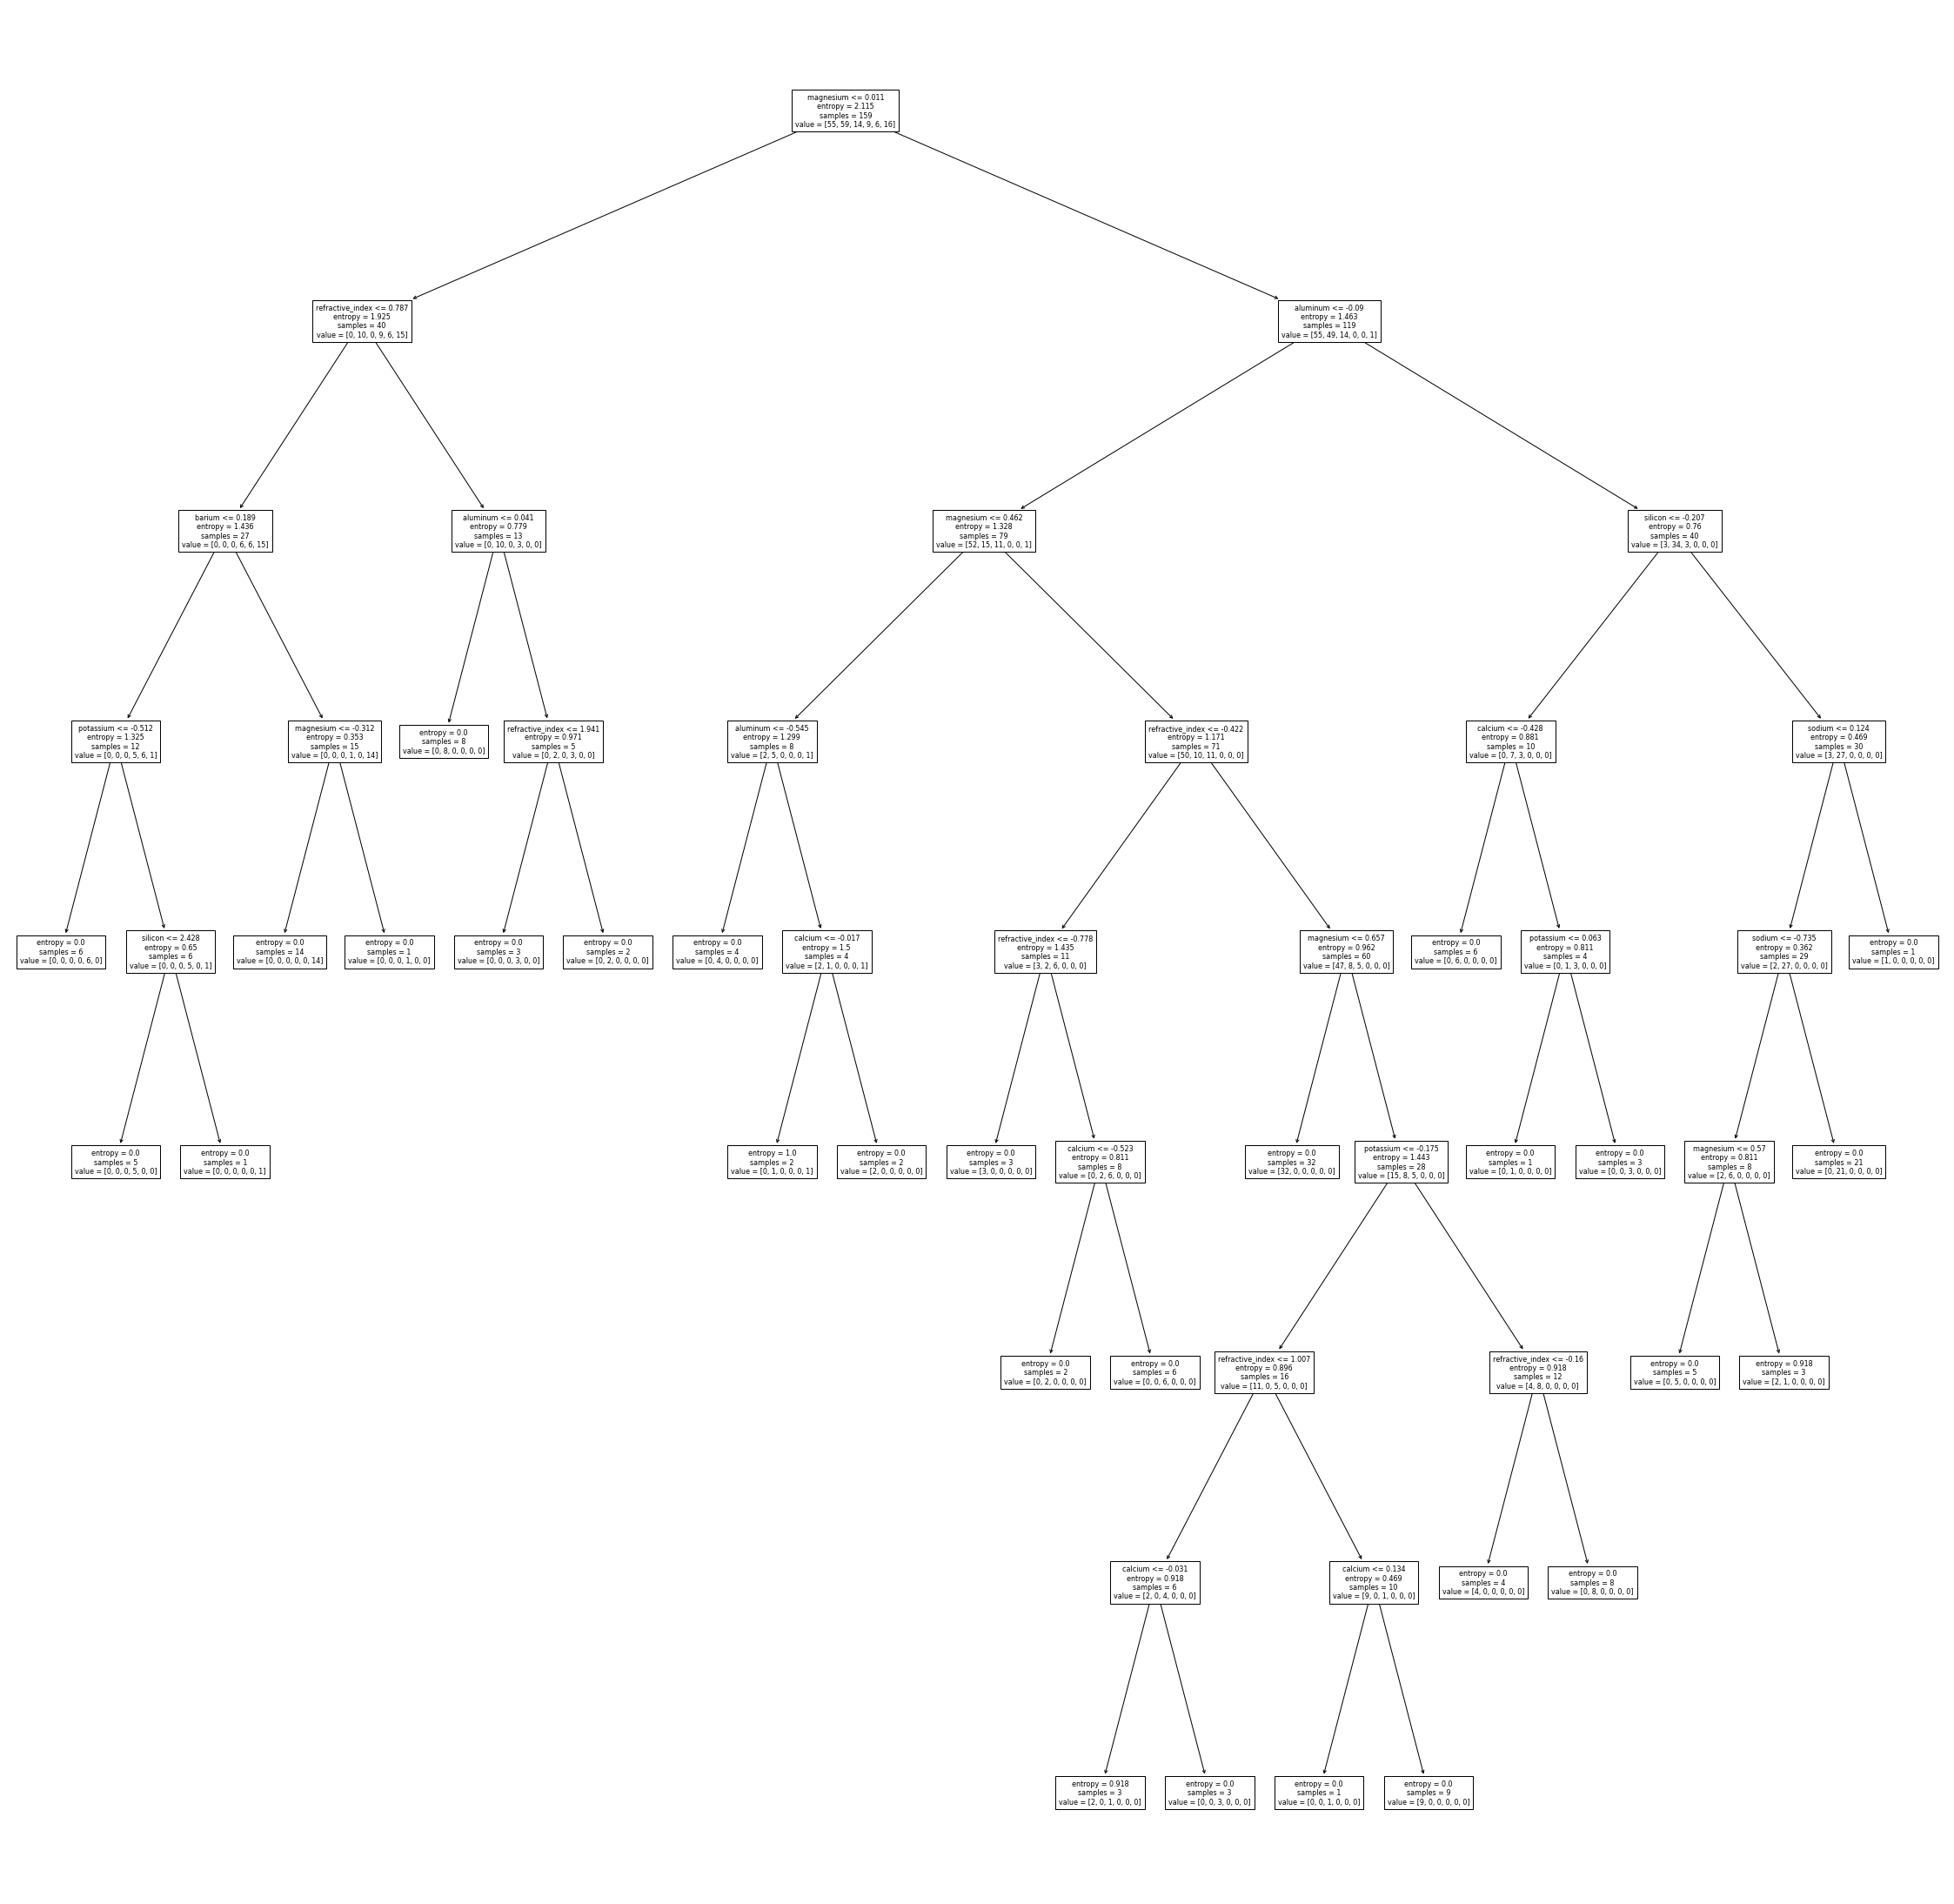

In [270]:
fig, ax = plt.subplots(figsize=(40, 40))
plot_tree(model2, feature_names=X_transformed_df.columns, fontsize=8)
plt.show()

Con el Modelo tuneado mejora la precisión de predicción de todas las clases excepto de una.

> # Random Forest Classifier

In [271]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

model_RF = RandomForestClassifier()

In [272]:
model_RF.fit(X_train, Y_train.values.ravel())

RandomForestClassifier()

In [273]:
model_RF.score(X_test, Y_test)

0.7037037037037037

In [274]:
print('Balanced Accuracy Score:')
print('Modelo tuneado:')
print('Sobre el conjunto de entrenamiento: {:.2f}'.format(balanced_accuracy_score(Y_train, model2.predict(X_train))))
print('Sobre el conjunto de test:          {:.2f}'.format(balanced_accuracy_score(Y_test, model2.predict(X_test))))

print('Modelo RF:')
print('Sobre el conjunto de entrenamiento: {:.2f}'.format(balanced_accuracy_score(Y_train, model_RF.predict(X_train))))
print('Sobre el conjunto de test:          {:.2f}'.format(balanced_accuracy_score(Y_test, model_RF.predict(X_test))))


Balanced Accuracy Score:
Modelo tuneado:
Sobre el conjunto de entrenamiento: 0.97
Sobre el conjunto de test:          0.78
Modelo RF:
Sobre el conjunto de entrenamiento: 1.00
Sobre el conjunto de test:          0.65


In [275]:
print('F1 Score Simple:')
print('Modelo Tuneado:')
print('Sobre el conjunto de entrenamiento: {:.2f}'.format(f1_score (Y_train, model2.predict(X_train), average='micro')))
print('Sobre el conjunto de test:          {:.2f}'.format(f1_score (Y_test, model2.predict(X_test),  average='micro')))
print('Modelo RF:')
print('Sobre el conjunto de entrenamiento: {:.2f}'.format(f1_score (Y_train, model_RF.predict(X_train), average='micro')))
print('Sobre el conjunto de test:          {:.2f}'.format(f1_score (Y_test, model_RF.predict(X_test),  average='micro')))

F1 Score Simple:
Modelo Tuneado:
Sobre el conjunto de entrenamiento: 0.98
Sobre el conjunto de test:          0.72
Modelo RF:
Sobre el conjunto de entrenamiento: 1.00
Sobre el conjunto de test:          0.70


In [276]:
print("f1_score modelo 2           ", f1_score(Y_test,model2.predict(X_test),average=None))
print("f1_score modelo RandomForest", f1_score(Y_test,model_RF.predict(X_test),average=None))

f1_score modelo 2            [0.69230769 0.68571429 0.57142857 0.72727273 0.85714286 0.81818182]
f1_score modelo RandomForest [0.66666667 0.66666667 0.         0.85714286 0.85714286 0.86956522]


In [277]:
print("f1_score modelo 2           ", f1_score(Y_train,model2.predict(X_train),average=None))
print("f1_score modelo RandomForest", f1_score(Y_train,model_RF.predict(X_train),average=None))


f1_score modelo 2            [0.98214286 0.98305085 0.96296296 1.         1.         0.96774194]
f1_score modelo RandomForest [1. 1. 1. 1. 1. 1.]


> Parece que aplicar un RandomForest podría estar sobreajustando.

> Tuning Random Forest

In [278]:
from sklearn.model_selection import GridSearchCV

In [279]:
param_grid = {'max_depth': [5, 10, 20], 'min_samples_split': [5, 10, 15]}
rf_2 = RandomForestClassifier()
grid = GridSearchCV(rf_2, param_grid, scoring="balanced_accuracy", cv=5)

In [280]:
grid.fit(X_train, Y_train.values.ravel())

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 20],
                         'min_samples_split': [5, 10, 15]},
             scoring='balanced_accuracy')

In [281]:
print("Los mejores hipermarámetros son %s con un score de %0.2f"
      % (grid.best_params_, grid.best_score_))

Los mejores hipermarámetros son {'max_depth': 10, 'min_samples_split': 5} con un score de 0.72


In [282]:
model_RF2 = grid.best_estimator_
model_RF2.fit(X_train, Y_train.values.ravel())

RandomForestClassifier(max_depth=10, min_samples_split=5)

In [283]:
print('Balanced Accuracy Score:')
print('Modelo tuneado:')
print('Sobre el conjunto de entrenamiento: {:.2f}'.format(balanced_accuracy_score(Y_train, model2.predict(X_train))))
print('Sobre el conjunto de test:          {:.2f}'.format(balanced_accuracy_score(Y_test, model2.predict(X_test))))
print('Modelo RF: (Posible Overfitting)')
print('Sobre el conjunto de entrenamiento: {:.2f}'.format(balanced_accuracy_score(Y_train, model_RF.predict(X_train))))
print('Sobre el conjunto de test:          {:.2f}'.format(balanced_accuracy_score(Y_test, model_RF.predict(X_test))))
print('Modelo RF - CrossValidation:')
print('Sobre el conjunto de entrenamiento: {:.2f}'.format(balanced_accuracy_score(Y_train, model_RF2.predict(X_train))))
print('Sobre el conjunto de test:          {:.2f}'.format(balanced_accuracy_score(Y_test, model_RF2.predict(X_test))))

Balanced Accuracy Score:
Modelo tuneado:
Sobre el conjunto de entrenamiento: 0.97
Sobre el conjunto de test:          0.78
Modelo RF: (Posible Overfitting)
Sobre el conjunto de entrenamiento: 1.00
Sobre el conjunto de test:          0.65
Modelo RF - CrossValidation:
Sobre el conjunto de entrenamiento: 1.00
Sobre el conjunto de test:          0.66


In [284]:
print('F1 Score Simple:')
print('Modelo tuneado:')
print('Sobre el conjunto de entrenamiento: {:.2f}'.format(f1_score (Y_train, model2.predict(X_train), average='micro')))
print('Sobre el conjunto de test:          {:.2f}'.format(f1_score (Y_test, model2.predict(X_test),  average='micro')))
print('Modelo RF:')
print('Sobre el conjunto de entrenamiento: {:.2f}'.format(f1_score (Y_train, model_RF.predict(X_train), average='micro')))
print('Sobre el conjunto de test:          {:.2f}'.format(f1_score (Y_test, model_RF.predict(X_test),  average='micro')))
print('Modelo RF - CrossValidation:')
print('Sobre el conjunto de entrenamiento: {:.2f}'.format(f1_score (Y_train, model_RF2.predict(X_train), average='micro')))
print('Sobre el conjunto de test:          {:.2f}'.format(f1_score (Y_test, model_RF2.predict(X_test),  average='micro')))


F1 Score Simple:
Modelo tuneado:
Sobre el conjunto de entrenamiento: 0.98
Sobre el conjunto de test:          0.72
Modelo RF:
Sobre el conjunto de entrenamiento: 1.00
Sobre el conjunto de test:          0.70
Modelo RF - CrossValidation:
Sobre el conjunto de entrenamiento: 0.99
Sobre el conjunto de test:          0.70


Parece que al intentar mejorar el modelo inicial tuneado (DecisionTree) con un RandomForest hemos bajado las métricas, y parece un modelo con overfitting. Además, hemos intentado encontrar los mejores Hyperparameters mediante CrossValidation, pero el modelo inicial tuneado parece funcionar mejor al ponerlo a prueba en el test.

> # Aplicamos CrossValidation



In [285]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': [5, 10, 20], 'min_samples_split': [5, 10, 15]}
dt2_model = DecisionTreeClassifier()
cv = GridSearchCV(dt2_model, param_grid, scoring="f1_micro", cv=10)

cv.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  UserWarning,


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [5, 10, 20],
                         'min_samples_split': [5, 10, 15]},
             scoring='f1_micro')

In [286]:
cv.cv_results_

{'mean_fit_time': array([0.00574245, 0.0050662 , 0.00509961, 0.00483999, 0.00538542,
        0.00508955, 0.00535564, 0.00481956, 0.00472052]),
 'mean_score_time': array([0.00350416, 0.00317192, 0.00333302, 0.00315406, 0.00353079,
        0.00328493, 0.00332804, 0.00298448, 0.00292215]),
 'mean_test_score': array([0.68625   , 0.68583333, 0.68583333, 0.67333333, 0.68      ,
        0.67333333, 0.68625   , 0.68      , 0.67333333]),
 'param_max_depth': masked_array(data=[5, 5, 5, 10, 10, 10, 20, 20, 20],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_min_samples_split': masked_array(data=[5, 10, 15, 5, 10, 15, 5, 10, 15],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 5, 'min_samples_split': 5},
  {'max_depth': 5, 'min_samples_split': 10},
  

In [287]:
print("Los mejores hipermarámetros son %s con un score de %0.2f"
      % (cv.best_params_, cv.best_score_))

Los mejores hipermarámetros son {'max_depth': 5, 'min_samples_split': 5} con un score de 0.69


In [288]:
dt3_model = cv.best_estimator_
dt3_model.fit(X_train, Y_train.values.ravel())

DecisionTreeClassifier(max_depth=5, min_samples_split=5)

In [289]:
print('Balanced Accuracy Score:')
print('Sobre el conjunto de entrenamiento: {:.2f}'.format(balanced_accuracy_score(Y_train, dt3_model.predict(X_train))))
print('Sobre el conjunto de test:          {:.2f}'.format(balanced_accuracy_score(Y_test, dt3_model.predict(X_test))))

Balanced Accuracy Score:
Sobre el conjunto de entrenamiento: 0.86
Sobre el conjunto de test:          0.61


In [290]:
print('F1 Score Simple:')
print('Sobre el conjunto de entrenamiento: {:.2f}'.format(f1_score (Y_train, dt3_model.predict(X_train), average='micro')))
print('Sobre el conjunto de test:          {:.2f}'.format(f1_score (Y_test, dt3_model.predict(X_test),  average='micro')))

F1 Score Simple:
Sobre el conjunto de entrenamiento: 0.89
Sobre el conjunto de test:          0.56


In [291]:
base_estimator = dt3_model
bag2_model = BaggingClassifier(base_estimator, n_estimators=5, max_samples=100, max_features=5)

In [292]:
bag2_model.fit(X_train, Y_train.values.ravel())

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5,
                                                        min_samples_split=5),
                  max_features=5, max_samples=100, n_estimators=5)

In [293]:
print('Balanced Accuracy Score:')
print('Sobre el conjunto de entrenamiento: {:.2f}'.format(balanced_accuracy_score(Y_train, bag2_model.predict(X_train))))
print('Sobre el conjunto de test:          {:.2f}'.format(balanced_accuracy_score(Y_test, bag2_model.predict(X_test))))
print('F1 Score Simple:')
print('Sobre el conjunto de entrenamiento: {:.2f}'.format(f1_score (Y_train, bag2_model.predict(X_train), average='micro')))
print('Sobre el conjunto de test:          {:.2f}'.format(f1_score (Y_test, bag2_model.predict(X_test),  average='micro')))

Balanced Accuracy Score:
Sobre el conjunto de entrenamiento: 0.78
Sobre el conjunto de test:          0.65
F1 Score Simple:
Sobre el conjunto de entrenamiento: 0.82
Sobre el conjunto de test:          0.65


In [294]:
param_grid = {'n_estimators': range(2, 11), 'max_samples': range(2, 101, 2)}
model = bag2_model
cv = GridSearchCV(model, param_grid, scoring="f1_micro", cv=10)

In [295]:
cv.fit(X_train, Y_train.values.ravel())

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  UserWarning,


GridSearchCV(cv=10,
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5,
                                                                               min_samples_split=5),
                                         max_features=5, max_samples=100,
                                         n_estimators=5),
             param_grid={'max_samples': range(2, 101, 2),
                         'n_estimators': range(2, 11)},
             scoring='f1_micro')

In [296]:
print("Los mejores hipermarámetros son %s con un score de %0.2f"
      % (cv.best_params_, cv.best_score_))

Los mejores hipermarámetros son {'max_samples': 86, 'n_estimators': 10} con un score de 0.76


In [297]:
bag3_model = cv.best_estimator_
bag3_model.fit(X_train, Y_train.values.ravel())

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5,
                                                        min_samples_split=5),
                  max_features=5, max_samples=86)

In [298]:
print('Balanced Accuracy Score:')
print('Modelo tuneado:')
print('Sobre el conjunto de entrenamiento: {:.2f}'.format(balanced_accuracy_score(Y_train, model2.predict(X_train))))
print('Sobre el conjunto de test:          {:.2f}'.format(balanced_accuracy_score(Y_test, model2.predict(X_test))))

print('Bagging')
print('Sobre el conjunto de entrenamiento: {:.2f}'.format(balanced_accuracy_score(Y_train, bag3_model.predict(X_train))))
print('Sobre el conjunto de test:          {:.2f}'.format(balanced_accuracy_score(Y_test, bag3_model.predict(X_test))))


Balanced Accuracy Score:
Modelo tuneado:
Sobre el conjunto de entrenamiento: 0.97
Sobre el conjunto de test:          0.78
Bagging
Sobre el conjunto de entrenamiento: 0.71
Sobre el conjunto de test:          0.48


In [299]:
print('F1 Score Simple:')
print('Modelo tuneado:')
print('Sobre el conjunto de entrenamiento: {:.2f}'.format(f1_score (Y_train, model2.predict(X_train), average='micro')))
print('Sobre el conjunto de test:          {:.2f}'.format(f1_score (Y_test, model2.predict(X_test),  average='micro')))

print('Bagging')
print('Sobre el conjunto de entrenamiento: {:.2f}'.format(f1_score (Y_train, bag3_model.predict(X_train), average='micro')))
print('Sobre el conjunto de test:          {:.2f}'.format(f1_score (Y_test, bag3_model.predict(X_test),  average='micro')))


F1 Score Simple:
Modelo tuneado:
Sobre el conjunto de entrenamiento: 0.98
Sobre el conjunto de test:          0.72
Bagging
Sobre el conjunto de entrenamiento: 0.84
Sobre el conjunto de test:          0.59


> # Otros modelos: LogisticRegression

In [17]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, Y_train.values.ravel())

LogisticRegression(max_iter=1000)

In [18]:
print('Balanced Accuracy Score:')
print('Sobre el conjunto de entrenamiento: {:.2f}'.format(balanced_accuracy_score(Y_train, lr_model.predict(X_train))))
print('Sobre el conjunto de test:          {:.2f}'.format(balanced_accuracy_score(Y_test, lr_model.predict(X_test))))

Balanced Accuracy Score:
Sobre el conjunto de entrenamiento: 0.66
Sobre el conjunto de test:          0.41


In [19]:
print('F1 Score:')
print('Sobre el conjunto de entrenamiento:', (f1_score(Y_train,lr_model.predict(X_train),average=None)))
print('Sobre el conjunto de test         :', (f1_score(Y_test,lr_model.predict(X_test),average=None)))

F1 Score:
Sobre el conjunto de entrenamiento: [0.73770492 0.75409836 0.         0.875      0.72727273 0.96774194]
Sobre el conjunto de test         : [0.4516129  0.43243243 0.         0.33333333 0.4        0.92307692]


In [20]:
print('F1 Score Simple:')
print('Sobre el conjunto de entrenamiento: {:.2f}'.format(f1_score (Y_train, lr_model.predict(X_train), average='micro')))
print('Sobre el conjunto de test:          {:.2f}'.format(f1_score (Y_test, lr_model.predict(X_test),  average='micro')))

F1 Score Simple:
Sobre el conjunto de entrenamiento: 0.74
Sobre el conjunto de test:          0.54


Con LogisticRegresion conseguimos métricas peores que con el modelo inicial, DecisionTree. Aplicamos Bagging para intentar optimizar dicho modelo y compararlo con los mejores resultados obtenidos hasta el momento.

In [60]:
base_estimator = LogisticRegression(max_iter=10000)
bag1_model = BaggingClassifier(base_estimator, n_estimators=5, max_samples=100, max_features=5)

In [61]:
bag1_model.fit(X_train, Y_train.values.ravel())

BaggingClassifier(base_estimator=LogisticRegression(max_iter=10000),
                  max_features=5, max_samples=100, n_estimators=5)

In [62]:
print('Balanced Accuracy Score:')
print('Sobre el conjunto de entrenamiento: {:.2f}'.format(balanced_accuracy_score(Y_train, bag1_model.predict(X_train))))
print('Sobre el conjunto de test:          {:.2f}'.format(balanced_accuracy_score(Y_test, bag1_model.predict(X_test))))
print('F1 Score Simple:')
print('Sobre el conjunto de entrenamiento: {:.2f}'.format(f1_score (Y_train, bag1_model.predict(X_train), average='micro')))
print('Sobre el conjunto de test:          {:.2f}'.format(f1_score (Y_test, bag1_model.predict(X_test),  average='micro')))

Balanced Accuracy Score:
Sobre el conjunto de entrenamiento: 0.46
Sobre el conjunto de test:          0.38
F1 Score Simple:
Sobre el conjunto de entrenamiento: 0.61
Sobre el conjunto de test:          0.54


Seguimos con valores muy bajos por lo que nos quedamos con DecisionTree.

# CONCLUSIONES

>El mejor modelo fue el modelo2, que se trataba de un DecisionTree optimizado con los siguientes hiperparámetros:

**model2 = DecisionTreeClassifier(criterion="entropy", max_depth=20, min_samples_split=4)**

In [300]:
print('Balanced Accuracy Score:')
print('Sobre el conjunto de entrenamiento: {:.2f}'.format(balanced_accuracy_score(Y_train, model2.predict(X_train))))
print('Sobre el conjunto de test:          {:.2f}'.format(balanced_accuracy_score(Y_test, model2.predict(X_test))))
print('\n')
print('F1 Score Simple:')
print('Sobre el conjunto de entrenamiento: {:.2f}'.format(f1_score (Y_train, model2.predict(X_train), average='micro')))
print('Sobre el conjunto de test:          {:.2f}'.format(f1_score (Y_test, model2.predict(X_test),  average='micro')))


Balanced Accuracy Score:
Sobre el conjunto de entrenamiento: 0.97
Sobre el conjunto de test:          0.78


F1 Score Simple:
Sobre el conjunto de entrenamiento: 0.98
Sobre el conjunto de test:          0.72
